- At this notebook we are going to show there is double start token where added during fine-tuning phase for TrOCR
- Important to note here we dont show any comprassion or test for CER aas we are focausing on techical part to solve some issues we found and may be those models could give better results 

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.8 MB/s eta 0:00:00


## 1- Korain fine tunned 

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


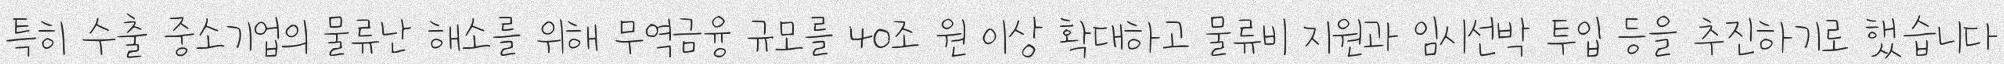

In [3]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, AutoTokenizer
import requests 
from io import BytesIO
from PIL import Image

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten") 
model = VisionEncoderDecoderModel.from_pretrained("daekeun-ml/ko-trocr-base-nsmc-news-chatbot")
tokenizer = AutoTokenizer.from_pretrained("daekeun-ml/ko-trocr-base-nsmc-news-chatbot")

url = "https://raw.githubusercontent.com/aws-samples/sm-kornlp/main/trocr/sample_imgs/news_1.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

If we set skip_special_tokens=False the easly we can see that classification token is added twice this means there is classfication token comming from tokenizer and other one come from visionEncoderDecoder wrapper 

In [4]:
pixel_values = processor(img, return_tensors="pt").pixel_values 
generated_ids = model.generate(pixel_values, max_length=64)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=False)[0] 
print(generated_text)

[CLS] [CLS] 특히 수출 중소기업의 물류난 해소를 위해 무역금융 규모를 40조 원 이상 확대하고 물류비 지원과 임시선박 투입 등을 추진하기로 했습니다 [SEP]


## 2- Chinese fine tunned model : priyank-m/m_OCR 
- https://huggingface.co/priyank-m/m_OCR


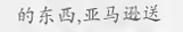

In [11]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, AutoTokenizer ,AutoImageProcessor
import requests 
from io import BytesIO
from PIL import Image

image_processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base")
model = VisionEncoderDecoderModel.from_pretrained("priyank-m/m_OCR")
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')
url = "https://priyank-m-m-ocr.hf.space/file=demo_image/img4.jpeg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [23]:
urlm = "https://priyank-m-m-ocr.hf.space/file=demo_image/img4.jpeg"
responsem = requests.get(urlm)
imgm = Image.open(BytesIO(responsem.content))
imgm.size

(183, 32)

In [12]:
image_processor.__dict__

{'_processor_class': None,
 'do_resize': True,
 'do_rescale': True,
 'do_normalize': True,
 'size': {'height': 224, 'width': 224},
 'resample': 2,
 'rescale_factor': 0.00392156862745098,
 'image_mean': [0.485, 0.456, 0.406],
 'image_std': [0.229, 0.224, 0.225]}

## we can see the same issue <s><s> has added twice during training  or fine-tuning phase 

In [13]:
pixel_values = image_processor(img, return_tensors="pt").pixel_values 
generated_ids = model.generate(pixel_values, max_length=40)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=False)[0] 
print(generated_text)

<s><s> 的单西,亚马逊送</s>


## 3- Germany : TrOCR Kurrent-Model 19th century 
https://huggingface.co/dh-unibe/trocr-kurrent 

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests 
from io import BytesIO
from PIL import Image

image_processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("dh-unibe/trocr-kurrent")

(1619, 271)


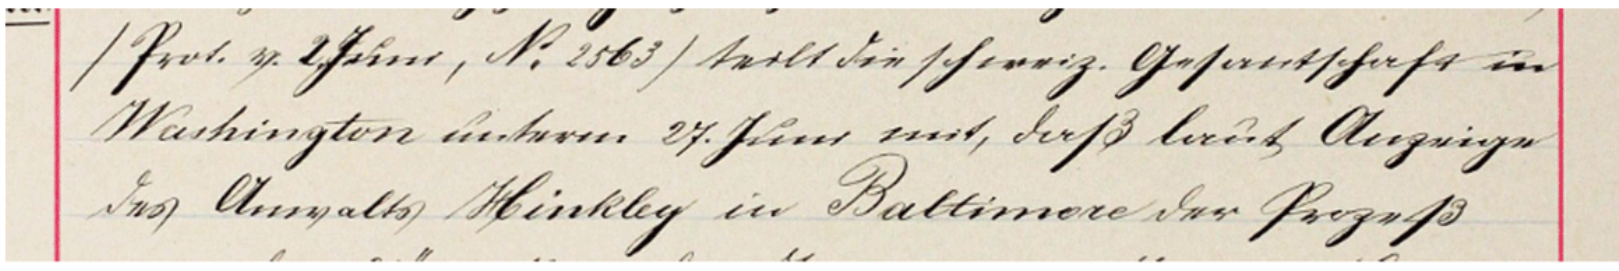

In [28]:
# source of image till 28-4-2023: (https://storage.googleapis.com/jnl-up-j-johd-files/journals/1/articles/46/submission/proof/46-10-600-1-17-20210709.png)
url = "/content/german_test.PNG"
image = Image.open("/content/german_test.PNG").convert("RGB")
print(image.size)
image

In [29]:
pixel_values = image_processor(image, return_tensors="pt").pixel_values 
generated_ids = model.generate(pixel_values, max_length=128)
generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=False)[0] 
print(generated_text)

<s><s>ים, بشكل דער selv preapunkt学生tan на eti Det,但是 Informationen</s>


## 4- DH-Lab : 
- This checkpoint uploaded to : AlhitawiMohammed22/Arany200
- where it is given by DH-Lab ELTE Resarchers 
- https://huggingface.co/AlhitawiMohammed22/Arany200/tree/main 
- The model could be found at (http://mobydick.elte-dh.hu:42005/)

In [30]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) Y
Token is valid.
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub.
Run the following command in your terminal in case you want to set the 'store' credential helper as d

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [32]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, AutoTokenizer
import requests 
from io import BytesIO
from PIL import Image

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten") 
model = VisionEncoderDecoderModel.from_pretrained("AlhitawiMohammed22/Arany200")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [33]:
img =  '/content/gdrive/MyDrive/Parallel_GPT2/hu_words/test/18.jpg'
img = Image.open(img).convert("RGB")
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
generated_text

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (64) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'<s><s>Warkinytere üvelesen az füvet evel, dass levért Üts Ülegánya</s>'

## 5- our models 
you can pick any uploaded checkpoint in our hub through this link (https://huggingface.co/AlhitawiMohammed22)

## 6 - TrOCR correct testing 
- we can see that the original TrOCR models dont have this issue . Let us see one example or TrOCR base one 
- https://huggingface.co/microsoft/trocr-base-handwritten 
- So we can see no doublication are used and they are using start of token is the same as end of token 


In [34]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import requests

# load image from the IAM database
url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')
pixel_values = processor(images=image, return_tensors="pt").pixel_values

generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
generated_text

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1313: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


'</s>indus the</s>'